# Bohmian flow near nodal points

Plot velocity field from Bohmian equations at a fixed time alongisde the position of the noda point at that same time.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Bohmian_velocity_field(t, u, PARAMETERS=[1,1,1]):
    x, y = u.T
    #model parameters
    a, b, omega2 = PARAMETERS
    #velocity components
    G = 1 + 2*a*x*np.cos(t) +\
        2*b*np.sqrt(omega2)*x*y*np.cos((1 + omega2)*t) +\
        (a*x)**2 +\
        2*a*b*np.sqrt(omega2)*x**2*y*np.cos(omega2*t) +\
        omega2*(b*x*y)**2
    vx = -(a*np.sin(t) + b*np.sqrt(omega2)*y*np.sin((1 + omega2)*t))/G
    vy = -b*np.sqrt(omega2)*x*(a*x*np.sin(omega2*t) + np.sin((1 + omega2)*t))/G
    
    return np.column_stack([vx, vy])

In [3]:
def Bohmian_nodal_point(t, PARAMETERS=[1,1,1]):
    #model parameters
    a, b, omega2 = PARAMETERS
    #nodal components
    x_nodal = -np.sin((1 + omega2)*t)/(a*np.sin(omega2*t))
    y_nodal = -a*np.sin(t)/(b*np.sqrt(omega2)*np.sin((1 + omega2)*t))
    
    return np.column_stack([x_nodal, y_nodal])

Nodal points assumed to take the form

\begin{align*}
x_N &= -\frac{sin((1 + c)t)}{a sin(ct)}\\
y_N &= -\frac{a sin(t)}{b c^{1/2} sin((1 + c)t)}
\end{align*}

where $a$ and $b$ come from the wave equation

\begin{equation}
\Psi(x, y, t) = \psi_{0,0} + a \psi_{1,0} + b \psi_{1,1}
\end{equation}

whereas $c = \omega_2$ is the frequency of the second harmonic oscillator in the Hamiltonian function

\begin{equation}
H(x,y) = \frac{1}{2}(p_x^2 + p_y^2) + \frac{1}{2}(x^2 + (\omega_2 y)^2)
\end{equation}

while the frequency for the first oscillator is equal to the unit

# Plot nodal lines

In [71]:
t0, tf, dt = [0.01, 200, 0.001]
t = np.arange(t0, tf, dt)

In [72]:
a, b, omega2 = [1, 1, 1/np.sqrt(2)]
nodal_point = Bohmian_nodal_point(t, PARAMETERS=[a, b, omega2])

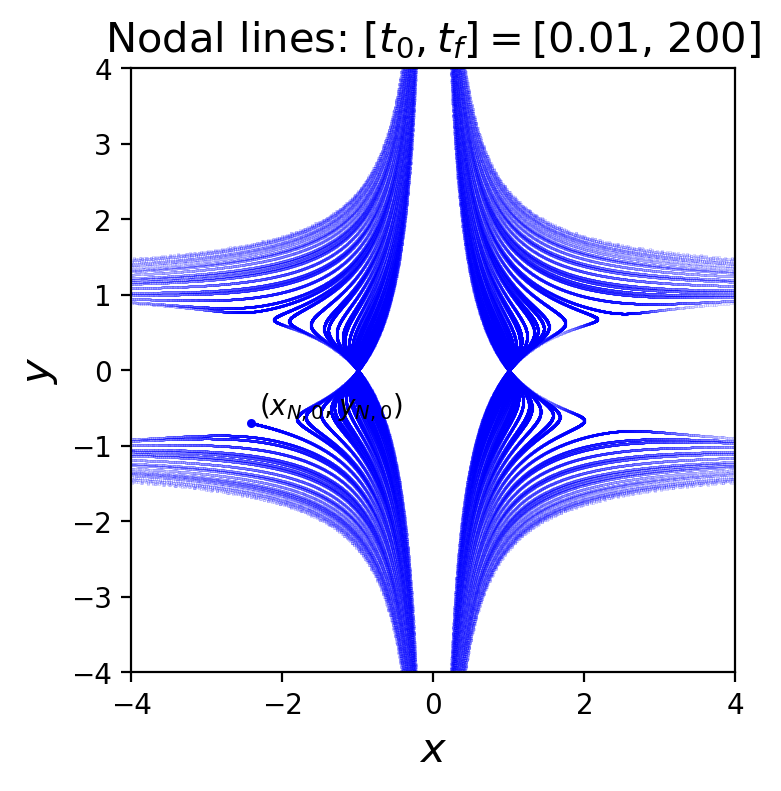

In [73]:
fig,ax = plt.subplots(1,1,dpi=200)

ax.scatter(*nodal_point[0],s=5,c='blue',zorder=10)
text_offset = 0.1
ax.text(*nodal_point[0]+text_offset, "$(x_{N,0}, y_{N,0})$", alpha=1)

ax.scatter(*nodal_point.T,s=0.01,c='blue', alpha=0.5)

#customise plot
title = "Nodal lines: $[t_0, t_f] = [$"+str(t0)+", "+str(tf)+"]"
ax.set_title(title, fontsize=15)
ax.set_xlim(-4,4)
ax.set_ylim(-4,4)
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
ax.set_aspect('equal')

plt.show()

<span style="color:red"><b>NOTE</b></span> The nodal points have singular values for some values of $t$

* $x_N$ will be singular for $t_{n_x} = 2\pi n_x / \omega_2$, with $n_x = 0, 1, ...$

* $y_N$ will be singular for $t_{n_y} = 2\pi n_y / (1 + \omega_2)$, with $n_y = 0, 1, ...$

So, the nodal points are undefined for an infine number of time-points.

__Note that__ the nodal lines are not physical trajectories.

# Regular and chaotic trajectories

## Case: $(a, b, \omega_2) = (1, 1, 1/\sqrt{2})$

Vector field

In [74]:
a, b, omega2 = [1, 1, 1/np.sqrt(2)]
vector_field = lambda t,u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

Time-integration parameters

In [75]:
t0, tf = [0, 200]
time_span = (t0, tf)

Set initial condition and solve trajectory

In [76]:
from scipy.integrate import solve_ivp

<span style="color:red">__NOTE__</span> INITIAL CONDITION TAKEN FROM _Review_ (2020), Figure 6.

In [77]:
IC_regular = np.array([0.75, 0.25]) # regular (ordered) orbit
IC_chaotic = np.array([-1, -1]) # chaotic orbit

In [78]:
solution_regular = solve_ivp(vector_field, time_span, IC_regular, rtol=1.0e-12)
trajectory_regular = solution_regular.y

solution_chaotic = solve_ivp(vector_field, time_span, IC_chaotic, rtol=1.0e-12)
trajectory_chaotic = solution_chaotic.y

Plot trajectory

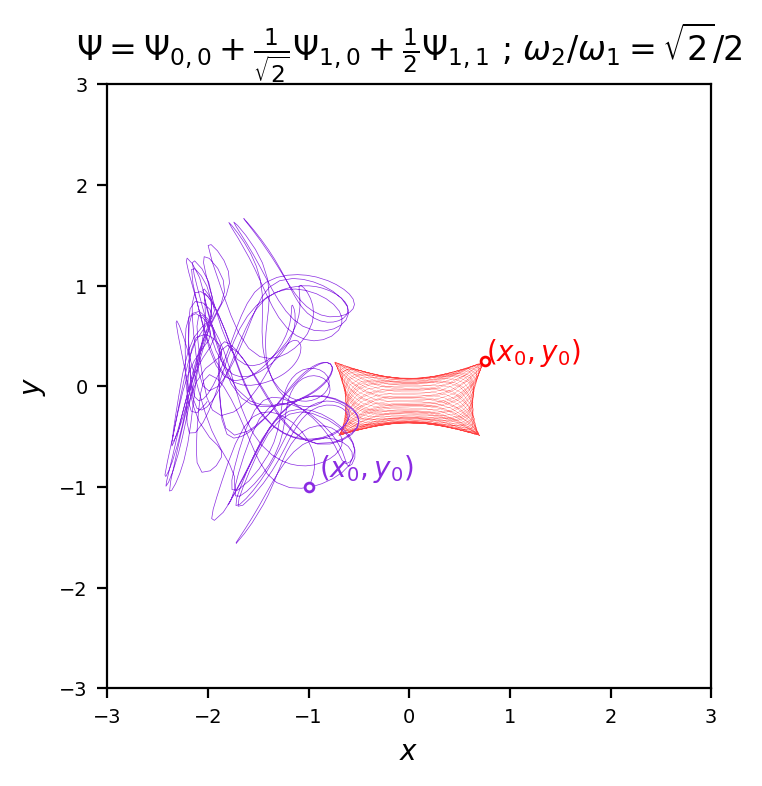

In [117]:
fig,ax = plt.subplots(1,1,figsize=(4,4),dpi=200)

#################################################
#
# Trajectory of the evolution of ICs
#
#################################################
# Regular IC
color_regular = 'red'
ax.scatter(*trajectory_regular.T[0],s=10,c="white",edgecolor=color_regular,zorder=10)
# label initial condition
text_offset = 0.01
ax.text(*trajectory_regular.T[0]+text_offset, "$(x_0, y_0)$",color=color_regular,alpha=1)
# plot trajectory            
ax.plot(*trajectory_regular,lw=0.1, color=color_regular, alpha=0.75)

# Chaotic IC
color_chaotic = 'blueviolet'
ax.scatter(*trajectory_chaotic.T[0],s=10,c="white",edgecolor='blueviolet',zorder=10)
# label initial condition
text_offset = 0.1
ax.text(*trajectory_chaotic.T[0]+text_offset,"$(x_0, y_0)$",color=color_chaotic,alpha=1)
# plot trajectory            
ax.plot(*trajectory_chaotic,lw=0.25, color=color_chaotic)
#################################################
#
# Nodal point states
#
#################################################
#plot all nodal point states
color_nodal = 'black'
# ax.scatter(*nodal_point.T,s=0.01,c=color_nodal,edgecolor="black",alpha=0.05)
#plot initial state nodal point
# ax.scatter(*nodal_point[0],s=10,c=color_nodal,zorder=10)
#label initial state
# text_offset = 0.1
# ax.text(*nodal_point[0]+text_offset, "$(x_{N,0}, y_{N,0})$",color=color_nodal,alpha=1)
#################################################
#
# Customise appearance
#
#################################################
# title = "Single trajectories: $[t_0, t_f] = [$"+str(t0)+", "+str(tf)+"]"
title = ("$\Psi = \Psi_{0,0} + \\frac{1}{\sqrt{2}} \Psi_{1,0} + \\frac{1}{2} \Psi_{1,1}$"
         " ; $\omega_2/\omega_1 = \sqrt{2}/2$"
        )
ax.set_title(title, fontsize=12)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_xlabel("$x$", fontsize=10)
ax.set_ylabel("$y$", fontsize=10)
ax.tick_params(axis='both', labelsize=7)
ax.set_aspect('equal')
# ax.grid()

plt.show()

## Case: $(a, b, \omega_2) = (1, 0, 1)$

Vector field

In [9]:
a, b, omega2 = [1, 0, 1]
vector_field = lambda t,u: Bohmian_velocity_field(t, u, PARAMETERS=[a, b, omega2])

Time-integration parameters

In [13]:
t0, tf = [0, 100]
time_span = (t0, tf)

Set initial condition and solve trajectory

In [14]:
from scipy.integrate import solve_ivp

<span style="color:red">__NOTE__</span> INITIAL CONDITION TAKEN FROM _Review_ (2020), Figure 6.

In [15]:
IC_regular = np.array([0.75, 0.25]) # regular (ordered) orbit
IC_chaotic = np.array([-1, -1]) # chaotic orbit

In [ ]:
solution_regular = solve_ivp(vector_field, time_span, IC_regular, rtol=1.0e-12)
trajectory_regular = solution_regular.y

solution_chaotic = solve_ivp(vector_field, time_span, IC_chaotic, rtol=1.0e-12)
trajectory_chaotic = solution_chaotic.y

/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/ba13026/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Plot trajectory

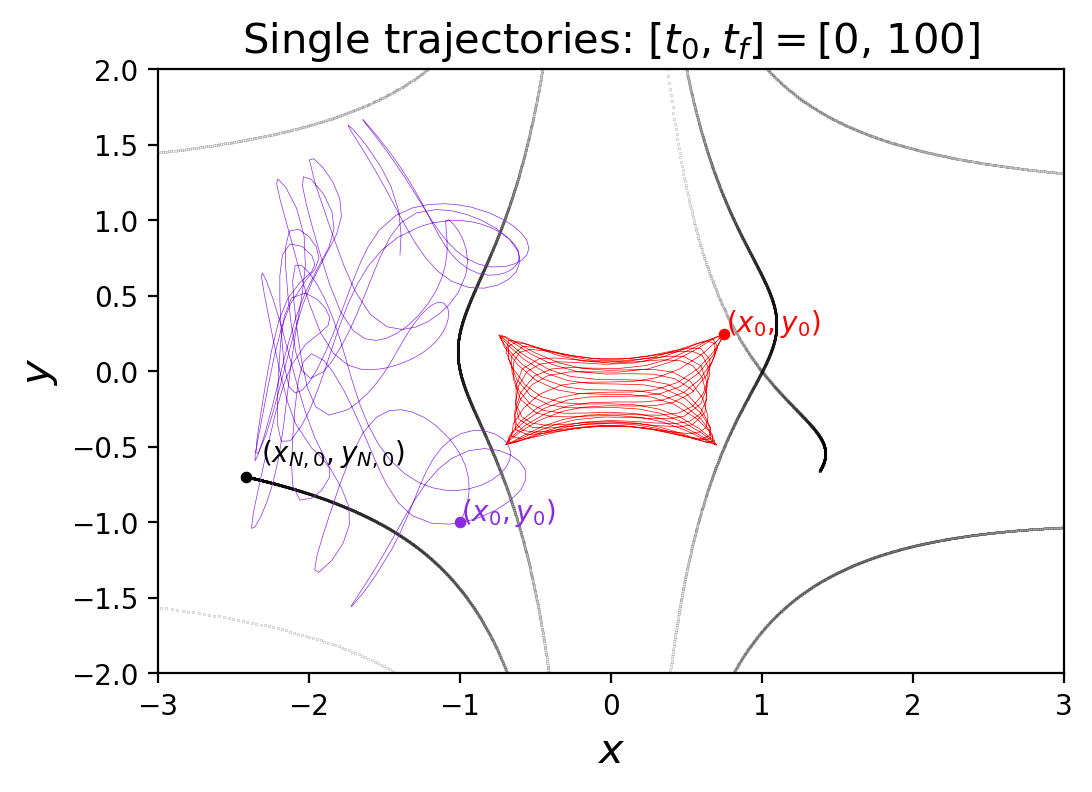

In [37]:
fig,ax = plt.subplots(1,1,dpi=200)

#################################################
#
# Trajectory of the evolution of ICs
#
#################################################
# Regular IC
color_regular = 'red'
ax.scatter(*trajectory_regular.T[0],s=10,c=color_regular,zorder=10)
# label initial condition
text_offset = 0.01
ax.text(*trajectory_regular.T[0]+text_offset, "$(x_0, y_0)$",color=color_regular,alpha=1)
# plot trajectory            
ax.plot(*trajectory_regular,lw=0.25, color=color_regular)

# Chaotic IC
color_chaotic = 'blueviolet'
ax.scatter(*trajectory_chaotic.T[0],s=10,c=color_chaotic,zorder=10)
# label initial condition
text_offset = 0.01
ax.text(*trajectory_chaotic.T[0]+text_offset, "$(x_0, y_0)$",color=color_chaotic,alpha=1)
# plot trajectory            
ax.plot(*trajectory_chaotic,lw=0.25, color=color_chaotic)
#################################################
#
# Nodal point states
#
#################################################
#plot all nodal point states
# color_nodal = 'black'
# ax.scatter(*nodal_point.T,s=0.01,c=color_nodal,alpha=0.5)
# #plot initial state nodal point
# ax.scatter(*nodal_point[0],s=10,c=color_nodal,zorder=10)
# #label initial state
# text_offset = 0.1
# ax.text(*nodal_point[0]+text_offset, "$(x_{N,0}, y_{N,0})$",color=color_nodal,alpha=1)
#################################################
#
# Customise appearance
#
#################################################
title = "Single trajectories: $[t_0, t_f] = [$"+str(t0)+", "+str(tf)+"]"
ax.set_title(title, fontsize=15)
ax.set_xlim(-3,3)
ax.set_ylim(-2,2)
ax.set_xlabel("$x$", fontsize=15)
ax.set_ylabel("$y$", fontsize=15)
ax.set_aspect('equal')

plt.show()

## Single trajectory: moving frame

Nodal points assumed to take the form

\begin{align*}
x_N &= -\frac{sin((1 + c)t)}{a sin(ct)}\\
y_N &= -\frac{a sin(t)}{b c^{1/2} sin((1 + c)t)}
\end{align*}

"Speed" of nodal points

In [118]:
import sympy as sym

In [119]:
a,b,c,t = sym.symbols('a b c t')

Compute $dx_N / dt$

In [120]:
xN = - sym.sin((1 + c)*t)/(a *sym.sin(c*t))
xN

-sin(t*(c + 1))/(a*sin(c*t))

In [121]:
dxN_dt = sym.diff(xN, t)
dxN_dt = dxN_dt.simplify()
dxN_dt

(c*sin(t) - sin(c*t)*cos(c*t + t))/(a*sin(c*t)**2)

Compute $dy_N / dt$

In [122]:
yN = - a*sym.sin(t)/(b * sym.sqrt(c) *sym.sin((1+c)*t))
yN

-a*sin(t)/(b*sqrt(c)*sin(t*(c + 1)))

In [123]:
dyN_dt = sym.diff(yN, t)
dyN_dt = dyN_dt.simplify()
dyN_dt

a*(c*sin(t)*cos(t*(c + 1)) - sin(c*t))/(b*sqrt(c)*sin(t*(c + 1))**2)

Vector field for nodal points

In [136]:
def NodalPoints_vector_field(t0, PARAMETERS = [1,1,1]):
    #model parameters
    a0, b0, c0 = PARAMETERS
    #substitute in symbolic expressions
    dxN_dt_params = dxN_dt.subs([(a,a0),(b,b0),(c,c0)])
    dyN_dt_params = dyN_dt.subs([(a,a0),(b,b0),(c,c0)])
    #define vector field
    if not type(t0) == float:
        vx = sym.lambdify(t0, dxN_dt_params, "numpy")
        vy = sym.lambdify(t0, dyN_dt_params, "numpy")
    else:
        vx = float(dxN_dt_params.subs(t, t0))
        vy = float(dyN_dt_params.subs(t, t0))
        
    v  = np.column_stack([vx, vy])
    
    return v

In [144]:
a0, b0, c0 = PARAMETERS
#substitute in symbolic expressions
dxN_dt_params = dxN_dt.subs([(a,a0),(b,b0),(c,c0)])
dyN_dt_params = dyN_dt.subs([(a,a0),(b,b0),(c,c0)])

In [148]:
dyN_dt_params.evalf(t, 1.27)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [145]:
sym.lambdify(1.27, dxN_dt_params, "numpy")

SyntaxError: invalid syntax (<lambdifygenerated-5>, line 1)

In [138]:
t0 = 1.27
a0, b0, omega2 = [1, 1, np.sqrt(2)/2]

v0_nodal = NodalPoints_vector_field(1.27, PARAMETERS=[a0, b0, omega2])

TypeError: can't convert expression to float

Bohminal flow wrt nodal point frame of reference

In [126]:
a0, b0, omega2 = [1, 1, np.sqrt(2)/2]
PARAMETERS = [a0, b0, omega2]

v1 = Bohmian_velocity_field
v2 = NodalPoints_vector_field
vector_field = lambda t, u: (v1(t, u, PARAMETERS) - v2(t, PARAMETERS)).flatten()

Plot single trajectory

In [111]:
t0 = 0.01
tau_max = 1.25

dt = 0.001
time_span = (t0, tau_max)
time_store = np.arange(t0, tau_max, dt)

In [112]:
IC = np.array([-1.15, -1.15])

In [113]:
from scipy.integrate import solve_ivp

In [114]:
solution = solve_ivp(vector_field, time_span, IC, t_eval=time_store, rtol=1.0e-4)

SyntaxError: invalid syntax (<lambdifygenerated-2>, line 1)

In [ ]:
fig,ax = plt.subplots(1,2,dpi=100,figsize=(10,5))

ax[0].plot(*trajectory_positions,'b-',lw=0.5,marker='o',markersize=0.1,alpha=1)
ax[0].scatter(*IC_positions,c='r')

ax[0].set_xlabel("$x$", fontsize=15)
ax[0].set_ylabel("$y$", fontsize=15)
ax[0].set_title("Configuration space", fontsize=18)

ax[1].plot(trajectory_positions[1])

plt.show()

Make grid

# TO-DO

* Compute the temporal derivative of the nodal points and then take the difference between the Bohmian velocity field and the "velocity" of the nodal points.

* Reproduce Figure 4 form PhysRevE 2009 paper, trying equations (24), for different values of $t$ in there.